# Rule Based Classification Problem
                                       
                                   


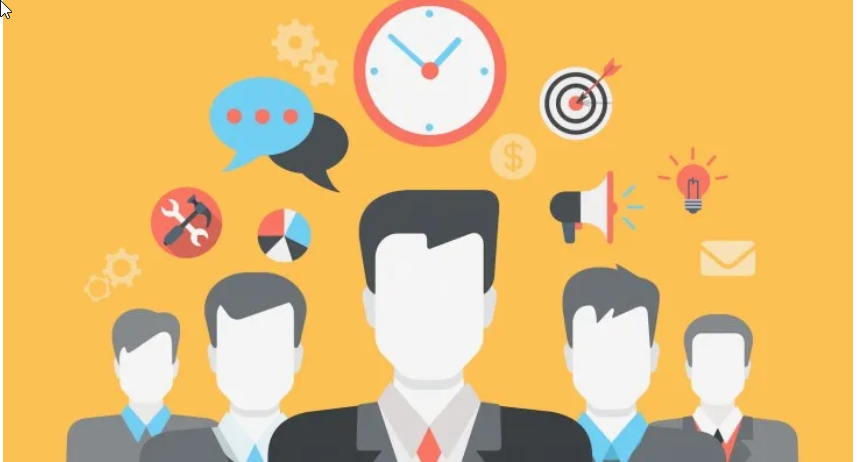

To summarize our project, one of game company would like to learn how much money its new customers will potentially spend by observing the purchasing movements within the application. The company wants to segment its customers and plan the necessary notifications, additional scores or mail marketing.You have a dataset that includes the Country, Source, Age, Sex information of the customers and their game purchases.


1- Price: Payments made by costumers 

2- Source: The operating system used, including IOS and Android

3- Sex: Gender of users, Female and Male

4- Country : Information from which country the costumers are from

5- Age: Age of costumers

Persona.csv data set contains the prices of the products sold by an international game company and some demographic information of the users who purchased these products. The data set consists of records created in each sales transaction. This means the table is not deduplicated. In other words, a user with certain demographic characteristics may have made more than one purchase.


Getting started, we define our previously downloaded persona.csv dataset as a DataFrame with Pandas’ read_csv function.

In [116]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
df = pd.read_csv("persona.csv")

df.shape  # Returns a dimensionality of the DataFrame
df.describe().T # Generates descriptive statistic
df.isnull().values.any() # Returns any value is missing in DataFrame
df.isnull().sum() #  Returns how many missing values exist in the DataFrame
df.head() # Returns the first 5 rows for quickly checking data


,INDEX,PRICE,SOURCE,SEX,COUNTRY,AGE
0,0,39,android,male,bra,17
1,1,39,android,male,bra,17
2,2,49,android,male,bra,17
3,3,29,android,male,tur,17
4,4,49,android,male,tur,17


Now we look at the unique value numbers and frequencies for a number of categorical variables. We make such operations and observations in order to get to know our data set better.

In [117]:
df['SOURCE'].nunique()
df['SOURCE'].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

Next, we will examine the values of multiple variables together and observe their breakdown. 

In [118]:
df.groupby("COUNTRY")["PRICE"].mean()


df.groupby("SOURCE")["PRICE"].mean()

#Country and Source breakdown of income averages
df.groupby(["COUNTRY","SOURCE"])["PRICE"].mean()

COUNTRY  SOURCE 
bra      android    34.387029
         ios        34.222222
can      android    33.330709
         ios        33.951456
deu      android    33.869888
         ios        34.268817
fra      android    34.312500
         ios        32.776224
tur      android    36.229437
         ios        33.272727
usa      android    33.760357
         ios        34.371703
Name: PRICE, dtype: float64

Average income on the basis of variables

In [119]:
agg_df=(df.groupby(["COUNTRY","SOURCE","SEX", "AGE"])["PRICE"].mean()).sort_values(ascending= False)
agg_df


COUNTRY  SOURCE   SEX     AGE
bra      android  male    46     59.0
usa      android  male    36     59.0
fra      android  female  24     59.0
usa      ios      male    32     54.0
deu      android  female  36     49.0
                                 ... 
usa      ios      female  38     19.0
                          30     19.0
can      android  female  27     19.0
fra      android  male    18     19.0
deu      android  male    26      9.0
Name: PRICE, Length: 348, dtype: float64

After the above processes, all our columns that we received groupby gained index feature in DataFrame. Index is like an address, that’s how any data point across the dataframe can be accessed. Rows and columns both have indexes, rows indices are called as index and for columns its general column names. First, we want to get the index property of these columns and qualify it as a variable.


In [120]:
# Convert the index names to variable names
agg_df=agg_df = pd.DataFrame(agg_df)


In [121]:
agg_df.reset_index(inplace=True)

We want to divide the customers into certain groups by converting the numerical variable of age into a categorical variable. This process is critical for segmenting our customers.

In [122]:
agg_df["AGE_CAT"] = pd.cut(agg_df["AGE"],[0,18,23,30,40,70],labels= ['0_18', '19_23', '24_30', '31_40', '41_70'])
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,male,46,59.0,41_70
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40


Before we segment our customers, we put them in a persona.there is a list comprehension structure that saves our lives most of the time. List comprehension offers a shorter syntax when you want to create a new list based on the values of an existing list. 


In [123]:
agg_df.values

array([['bra', 'android', 'male', 46, 59.0, '41_70'],
       ['usa', 'android', 'male', 36, 59.0, '31_40'],
       ['fra', 'android', 'female', 24, 59.0, '24_30'],
       ...,
       ['can', 'android', 'female', 27, 19.0, '24_30'],
       ['fra', 'android', 'male', 18, 19.0, '0_18'],
       ['deu', 'android', 'male', 26, 9.0, '24_30']], dtype=object)

In [126]:
agg_df["customers_level_based"] = [str(i[0]).upper() + "_" + str(i[1]).upper() +
                                    "_" + str(i[2]).upper() + "_" + str(i[5]).upper() for i in agg_df.values]


In [127]:
agg_df = agg_df[["customers_level_based","PRICE"]]

For example, there may be more than one of the following: USA_ANDROID_MALE_0_18

In [128]:
agg_df["customers_level_based"].value_counts().sort_values(ascending=False)

BRA_ANDROID_MALE_24_30      7
BRA_ANDROID_FEMALE_24_30    7
USA_ANDROID_MALE_24_30      7
USA_ANDROID_MALE_41_70      7
USA_IOS_FEMALE_24_30        7
                           ..
DEU_IOS_MALE_31_40          1
CAN_IOS_MALE_24_30          1
DEU_IOS_FEMALE_31_40        1
TUR_ANDROID_MALE_31_40      1
CAN_ANDROID_FEMALE_24_30    1
Name: customers_level_based, Length: 109, dtype: int64

In [130]:

agg_df= agg_df.groupby("customers_level_based")["PRICE"].mean()

In [131]:

agg_df=agg_df = pd.DataFrame(agg_df)

In [132]:
agg_df.reset_index(inplace=True)

Now we assign the characters of the customers which we have converted to unique values(persona value). We divide the personas into 4 groups from the least profitable customer group to the most profitable customer group. “D, C, B, A”


In [134]:
agg_df["SEGMENT"]=pd.qcut(agg_df["PRICE"],4,labels= ["D","C","B","A"])
agg_df

,customers_level_based,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.645303,B
1,BRA_ANDROID_FEMALE_19_23,34.077340,C
2,BRA_ANDROID_FEMALE_24_30,33.863946,C
3,BRA_ANDROID_FEMALE_31_40,34.898326,B
4,BRA_ANDROID_FEMALE_41_70,36.737179,A
...,...,...,...
104,USA_IOS_MALE_0_18,33.983495,C
105,USA_IOS_MALE_19_23,34.901872,B
106,USA_IOS_MALE_24_30,34.838143,B
107,USA_IOS_MALE_31_40,36.206324,A


We would like to take a look at the basic statistical values of the customer personas we have segmented.

In [135]:
agg_df.groupby("SEGMENT")["PRICE"].agg([np.mean,np.max,np.min,np.sum])

,mean,amax,amin,sum
SEGMENT,,,,
D,29.206780,32.333333,19.000000,817.789833
C,33.509674,34.077340,32.500000,904.761209
B,34.999645,36.000000,34.103727,944.990411
A,38.691234,45.428571,36.060606,1044.663328


Now our segmentation process is complete.
Next is to know which segments the new customers belong to and to potential purchases on average.

Let’s say a ... Which segment does a 33-year-old Turkish woman using Android belong? And how much income is it expected to generate on average?

In [136]:
new_user= "TUR_ANDROID_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.833333,A


Let’s say a 25-year-old French man downloaded the game and processing on game market with his Android device. In this case, which segment does it belong to and how much does it earn on average?

In [141]:
new_user = "FRA_ANDROID_MALE_24_30"
agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,PRICE,SEGMENT
58,FRA_ANDROID_MALE_24_30,33.0,C


This customer is in the C segment and spend potentially $33 to the game.